<a href="https://colab.research.google.com/github/mmsiqueira98/Aprendizado-de-Maquina/blob/main/AprendizadodeM%C3%A1quina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Aprendizado de Máquina

##Pacotes bibliotecas e links

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import graphviz
from sklearn import tree
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

#Regressão

## 1. Atributos Categóricos

Atributos Categóricos apresentam valores numéricos discretos para representar categorias.

In [2]:
data = pd.read_csv('/content/Student Performance new.csv')

In [3]:
data

,Unnamed: 0,race/ethnicity,parental level of education,lunch,test preparation course,math percentage,reading score percentage,writing score percentage,sex
0,0,group B,bachelor's degree,standard,none,0.72,0.72,0.74,F
1,1,group C,some college,standard,completed,0.69,0.90,0.88,F
2,2,group B,master's degree,standard,none,0.90,0.95,0.93,F
3,3,group A,associate's degree,free/reduced,none,0.47,0.57,0.44,M
4,4,group C,some college,standard,none,0.76,0.78,0.75,M
...,...,...,...,...,...,...,...,...,...
995,995,group E,master's degree,standard,completed,0.88,0.99,0.95,F
996,996,group C,high school,free/reduced,none,0.62,0.55,0.55,M
997,997,group C,high school,free/reduced,completed,0.59,0.71,0.65,F
998,998,group D,some college,standard,completed,0.68,0.78,0.77,F


### Atributo Categórico Nominal

In [4]:
data[['race/ethnicity','lunch','sex']].head()

,race/ethnicity,lunch,sex
0,group B,standard,F
1,group C,standard,F
2,group B,standard,F
3,group A,free/reduced,M
4,group C,standard,M


####One hot Coding

Esse método tem como objetivo transformar os valores de uma dada coluna em valor numérico, conforme visto abaixo.

In [5]:
data['sex_m'] = data['sex'].apply(lambda sex: 1 if sex =='M' else 0)
data['sex_f'] = data['sex'].apply(lambda sex: 1 if sex =='F' else 0)

In [6]:
data

,Unnamed: 0,race/ethnicity,parental level of education,lunch,test preparation course,math percentage,reading score percentage,writing score percentage,sex,sex_m,sex_f
0,0,group B,bachelor's degree,standard,none,0.72,0.72,0.74,F,0,1
1,1,group C,some college,standard,completed,0.69,0.90,0.88,F,0,1
2,2,group B,master's degree,standard,none,0.90,0.95,0.93,F,0,1
3,3,group A,associate's degree,free/reduced,none,0.47,0.57,0.44,M,1,0
4,4,group C,some college,standard,none,0.76,0.78,0.75,M,1,0
...,...,...,...,...,...,...,...,...,...,...,...
995,995,group E,master's degree,standard,completed,0.88,0.99,0.95,F,0,1
996,996,group C,high school,free/reduced,none,0.62,0.55,0.55,M,1,0
997,997,group C,high school,free/reduced,completed,0.59,0.71,0.65,F,0,1
998,998,group D,some college,standard,completed,0.68,0.78,0.77,F,0,1


###Atributo Categórico Ordinal

Nesse caso será realizado o atributo categórigo ordinal, visto que nas linhas de parental_education, por exemplo, os valores categóricos são classificados de acordo com sua ordem.

In [7]:
data[['parental level of education','test preparation course']]

,parental level of education,test preparation course
0,bachelor's degree,none
1,some college,completed
2,master's degree,none
3,associate's degree,none
4,some college,none
...,...,...
995,master's degree,completed
996,high school,none
997,high school,completed
998,some college,completed


In [8]:
data['parental level of education'].drop_duplicates()

0      bachelor's degree
1           some college
2        master's degree
3     associate's degree
8            high school
15      some high school
Name: parental level of education, dtype: object

In [9]:
parental_education_mapper = {
    "master's degree": 6,
    "bachelor's degree": 5,
    "associate's degree": 4,
    "some college": 3,
    "high school": 2,
    "some high school": 1,
}

In [10]:
data['parental level of education encoder'] = data['parental level of education'].map( parental_education_mapper)

In [11]:
data

,Unnamed: 0,race/ethnicity,parental level of education,lunch,test preparation course,math percentage,reading score percentage,writing score percentage,sex,sex_m,sex_f,parental level of education encoder
0,0,group B,bachelor's degree,standard,none,0.72,0.72,0.74,F,0,1,5
1,1,group C,some college,standard,completed,0.69,0.90,0.88,F,0,1,3
2,2,group B,master's degree,standard,none,0.90,0.95,0.93,F,0,1,6
3,3,group A,associate's degree,free/reduced,none,0.47,0.57,0.44,M,1,0,4
4,4,group C,some college,standard,none,0.76,0.78,0.75,M,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,group E,master's degree,standard,completed,0.88,0.99,0.95,F,0,1,6
996,996,group C,high school,free/reduced,none,0.62,0.55,0.55,M,1,0,2
997,997,group C,high school,free/reduced,completed,0.59,0.71,0.65,F,0,1,2
998,998,group D,some college,standard,completed,0.68,0.78,0.77,F,0,1,3


### Utilizando Atributos Numéricos

### Escala

In [12]:
data[['math percentage', 'reading score percentage', 'writing score percentage']]

,math percentage,reading score percentage,writing score percentage
0,0.72,0.72,0.74
1,0.69,0.90,0.88
2,0.90,0.95,0.93
3,0.47,0.57,0.44
4,0.76,0.78,0.75
...,...,...,...
995,0.88,0.99,0.95
996,0.62,0.55,0.55
997,0.59,0.71,0.65
998,0.68,0.78,0.77


Normalização

In [13]:
min = data['math percentage'].min()
max = data['math percentage'].max()
data['math norm'] = data['math percentage'].apply(lambda big: (big-min)/(max-min))

In [14]:
data.head()

,Unnamed: 0,race/ethnicity,parental level of education,lunch,test preparation course,math percentage,reading score percentage,writing score percentage,sex,sex_m,sex_f,parental level of education encoder,math norm
0,0,group B,bachelor's degree,standard,none,0.72,0.72,0.74,F,0,1,5,0.72
1,1,group C,some college,standard,completed,0.69,0.90,0.88,F,0,1,3,0.69
2,2,group B,master's degree,standard,none,0.90,0.95,0.93,F,0,1,6,0.90
3,3,group A,associate's degree,free/reduced,none,0.47,0.57,0.44,M,1,0,4,0.47
4,4,group C,some college,standard,none,0.76,0.78,0.75,M,1,0,3,0.76


In [15]:
min = data['math norm'].min()
max = data['math norm'].max()
print(min, max)

0.0 1.0


Na padronização, para que não percamos o outliers e para que ele não influencie no valor final, nos  devemos aplicar a seguinte fórmula **x1 = x - xm / desvio padrao**

In [16]:
mean = data['math percentage'].mean()
desvio = data['math percentage'].std()

data['math padr'] = data['math percentage'].apply(lambda x: (x-mean) / desvio)
data.shape

(1000, 14)

### Dados Faltantes

A tratativa dos dados faltantes deve ser feita de acordo com os valores disponíveis. 
Atributos Numéricos

##Regressão

Dado a altura de um jogador, qual deve ser o seu peso?

### Regressão Linear

In [17]:
model = LinearRegression()

In [18]:
nba = pd.read_csv('/content/nba2k-full.csv')

In [19]:
nba.shape

(464, 15)

In [20]:
nba

,full_name,rating,jersey,team,position,b_day,height,weight,salary,country,draft_year,draft_round,draft_peak,college,version
0,LeBron James,97,#23,Los Angeles Lakers,F,12/30/84,6-9 / 2.06,250 lbs. / 113.4 kg.,$37436858,USA,2003,1,1,NaN,NBA2k20
1,Kawhi Leonard,97,#2,Los Angeles Clippers,F,06/29/91,6-7 / 2.01,225 lbs. / 102.1 kg.,$32742000,USA,2011,1,15,San Diego State,NBA2k20
2,Giannis Antetokounmpo,96,#34,Milwaukee Bucks,F-G,12/06/94,6-11 / 2.11,242 lbs. / 109.8 kg.,$25842697,Greece,2013,1,15,NaN,NBA2k20
3,Kevin Durant,96,#7,Brooklyn Nets,F,09/29/88,6-10 / 2.08,230 lbs. / 104.3 kg.,$37199000,USA,2007,1,2,Texas,NBA2k20
4,James Harden,96,#13,Houston Rockets,G,08/26/89,6-5 / 1.96,220 lbs. / 99.8 kg.,$38199000,USA,2009,1,3,Arizona State,NBA2k20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
459,Chris Paul,88,#3,Oklahoma City Thunder,G,05/06/85,6-1 / 1.85,175 lbs. / 79.4 kg.,$41358814,USA,2005,1,4,Wake Forest,NBA2k21
460,Bradley Beal,88,#3,Washington Wizards,G,06/28/93,6-3 / 1.91,207 lbs. / 93.9 kg.,$28751774,USA,2012,1,3,Florida,NBA2k21
461,Rudy Gobert,87,#27,Utah Jazz,C,06/26/92,7-1 / 2.16,238 lbs. / 108 kg.,$27525281,France,2013,1,27,NaN,NBA2k21
462,Kyle Lowry,87,#7,Toronto Raptors,G,03/25/86,6-0 / 1.83,205 lbs. / 93 kg.,$30500000,USA,2006,1,24,Villanova,NBA2k21


In [21]:
data = nba.drop(['rating','draft_year'], axis=1)

In [22]:
data = nba[['weight','height']]
data

,weight,height
0,250 lbs. / 113.4 kg.,6-9 / 2.06
1,225 lbs. / 102.1 kg.,6-7 / 2.01
2,242 lbs. / 109.8 kg.,6-11 / 2.11
3,230 lbs. / 104.3 kg.,6-10 / 2.08
4,220 lbs. / 99.8 kg.,6-5 / 1.96
...,...,...
459,175 lbs. / 79.4 kg.,6-1 / 1.85
460,207 lbs. / 93.9 kg.,6-3 / 1.91
461,238 lbs. / 108 kg.,7-1 / 2.16
462,205 lbs. / 93 kg.,6-0 / 1.83


In [23]:
data['height'] = data['height'].apply(lambda height: float(height.split(sep='/')[-1].strip()))
data.shape

<ipython-input-23-db71c1ee9b7c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['height'] = data['height'].apply(lambda height: float(height.split(sep='/')[-1].strip()))


(464, 2)

In [24]:
data[['height']].describe().T

,count,mean,std,min,25%,50%,75%,max
height,464.0,1.996573,0.085295,1.75,1.93,2.01,2.06,2.24


In [25]:
data['weight'] = data['weight'].apply(lambda weight: float(weight.split(sep='/')[-1].split(sep='kg')[0].strip()))

<ipython-input-25-f71adc214c62>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['weight'] = data['weight'].apply(lambda weight: float(weight.split(sep='/')[-1].split(sep='kg')[0].strip()))


In [26]:
data
data.shape

(464, 2)

## Treino / Teste

In [27]:
predictors_train, predictors_test, target_train, target_test = train_test_split(
    data.drop(['weight'], axis=1),
    data['weight'],
    test_size = 0.25,
    random_state = 123
)

Variáveis Predictors

In [28]:
predictors_train.head()

,height
437,1.88
344,2.11
453,1.98
432,1.96
178,2.03


In [29]:
predictors_train.shape

(348, 1)

In [30]:
predictors_test.head()

,height
49,2.06
85,2.08
34,2.08
235,2.01
237,1.93


In [31]:
predictors_train.shape

(348, 1)

Variavel Target

In [32]:
target_train.head()

437     88.5
344     97.5
453     93.0
432     99.8
178    106.6
Name: weight, dtype: float64

In [33]:
target_train.shape

(348,)

In [34]:
target_test.head()

49     102.1
85     118.8
34     122.5
235    107.5
237     90.7
Name: weight, dtype: float64

In [35]:
target_test.shape

(116,)

###Treino

In [36]:
model = model.fit(predictors_train, target_train)

In [37]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['height'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([89.01307361]),
 'rank_': 1,
 'singular_': array([1.59706295]),
 'intercept_': -80.68550358078633}

In [38]:
a = model.coef_
a

array([89.01307361])

In [39]:
b = model.intercept_
b

-80.68550358078633

In [40]:
data.head(1)

,weight,height
0,113.4,2.06


In [41]:
altura = 2.06
peso = (a * altura) + b
peso

array([102.68142806])

In [42]:
altura = np.array([2.06])

In [43]:
peso = model.predict(altura.reshape(-1, 1))
print(peso)

[102.68142806]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


##Avaliação

In [44]:
target_predicted = model.predict(predictors_test)
target_predicted[0:5]

array([102.68142806, 104.46168953, 104.46168953,  98.23077438,
        91.10972849])

In [45]:
target_predicted.shape

(116,)

In [46]:
target_test[0:5]

49     102.1
85     118.8
34     122.5
235    107.5
237     90.7
Name: weight, dtype: float64

In [47]:
target_test.shape

(116,)

###RMSE

In [48]:
rmse = np.sqrt(mean_squared_error(target_test, target_predicted))
print(rmse)

7.803562158590227


In [49]:
test_data = pd.concat([predictors_test, pd.DataFrame(target_test, columns=['weight'])], axis = 1).reset_index(drop=True)

In [50]:
test_data['predicted'] = False
test_data.head()

,height,weight,predicted
0,2.06,102.1,False
1,2.08,118.8,False
2,2.08,122.5,False
3,2.01,107.5,False
4,1.93,90.7,False


In [51]:
prediction_data = pd.concat([predictors_test.reset_index(drop=True), pd.DataFrame(target_predicted, columns=['weight'])],axis=1).reset_index(drop=True)
prediction_data['predicted'] = True

In [52]:
prediction_data.tail()

,height,weight,predicted
111,2.13,108.912343,True
112,1.91,89.329467,True
113,2.06,102.681428,True
114,1.93,91.109728,True
115,1.93,91.109728,True


In [53]:
prediction = pd.concat([test_data, prediction_data]).reset_index(drop=True)
prediction.shape

(232, 3)

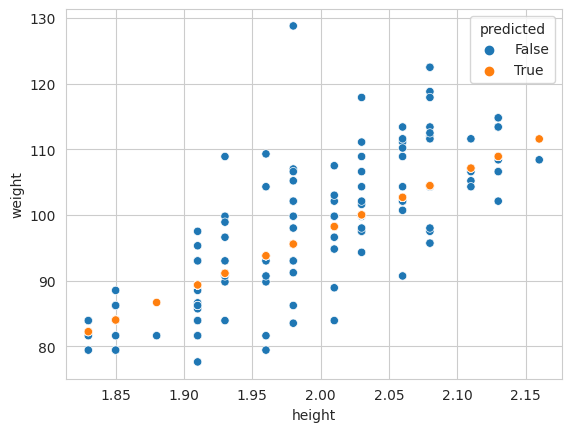

In [54]:
with sns.axes_style('whitegrid'): 
  sns.scatterplot(data=prediction, x = 'height', y = 'weight', hue='predicted')

### Comparação

In [55]:
data = nba[['weight','height','position']]
data.head()

,weight,height,position
0,250 lbs. / 113.4 kg.,6-9 / 2.06,F
1,225 lbs. / 102.1 kg.,6-7 / 2.01,F
2,242 lbs. / 109.8 kg.,6-11 / 2.11,F-G
3,230 lbs. / 104.3 kg.,6-10 / 2.08,F
4,220 lbs. / 99.8 kg.,6-5 / 1.96,G


In [56]:
data['position'].drop_duplicates()

0       F
2     F-G
4       G
6     F-C
9       C
20    G-F
44    C-F
Name: position, dtype: object

In [57]:
data['position_f'] = data['position'].apply(lambda sex: 1 if sex =='F' else 0)
data['position_fg'] = data['position'].apply(lambda sex: 1 if sex =='F-G' else 0)
data['position_g'] = data['position'].apply(lambda sex: 1 if sex =='G' else 0)
data['position_fc'] = data['position'].apply(lambda sex: 1 if sex =='F-C' else 0)
data['position_c'] = data['position'].apply(lambda sex: 1 if sex =='C' else 0)
data['position_gf'] = data['position'].apply(lambda sex: 1 if sex =='G-F' else 0)
data['position_cf'] = data['position'].apply(lambda sex: 1 if sex =='C-F' else 0)


<ipython-input-57-06256ce6bdff>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['position_f'] = data['position'].apply(lambda sex: 1 if sex =='F' else 0)
<ipython-input-57-06256ce6bdff>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['position_fg'] = data['position'].apply(lambda sex: 1 if sex =='F-G' else 0)
<ipython-input-57-06256ce6bdff>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

In [58]:
data[['position', 'position_f', 'position_fg', 'position_g', 'position_fc', 'position_c', 'position_gf', 'position_cf']]

,position,position_f,position_fg,position_g,position_fc,position_c,position_gf,position_cf
0,F,1,0,0,0,0,0,0
1,F,1,0,0,0,0,0,0
2,F-G,0,1,0,0,0,0,0
3,F,1,0,0,0,0,0,0
4,G,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...
459,G,0,0,1,0,0,0,0
460,G,0,0,1,0,0,0,0
461,C,0,0,0,0,1,0,0
462,G,0,0,1,0,0,0,0


In [59]:
data = data.drop(['position'], axis = 1)

In [60]:
data['height'] = data['height'].apply(lambda x: float(x.split(sep='/')[-1].strip()))

media = data['height'].mean()
desvio = data['height'].std()

data['height'] = data['height'].apply(lambda x: (x-media)/ desvio)

In [61]:
data.head(5)

,weight,height,position_f,position_fg,position_g,position_fc,position_c,position_gf,position_cf
0,250 lbs. / 113.4 kg.,0.743614,1,0,0,0,0,0,0
1,225 lbs. / 102.1 kg.,0.157415,1,0,0,0,0,0,0
2,242 lbs. / 109.8 kg.,1.329813,0,1,0,0,0,0,0
3,230 lbs. / 104.3 kg.,0.978094,1,0,0,0,0,0,0
4,220 lbs. / 99.8 kg.,-0.428785,0,0,1,0,0,0,0


In [62]:
data['weight'] = data['weight'].apply(lambda x: float(x.split(sep='/')[-1].split(sep='kg')[0].strip()))

In [63]:
predictors_train, predictors_test, target_train, target_test = train_test_split(
    data.drop(['weight'], axis = 1), 
    data['weight'], 
    test_size = 0.25,
    random_state=123
    
)

In [64]:
model_v2 = model.fit(predictors_train, target_train)
model_v2.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['height', 'position_f', 'position_fg', 'position_g', 'position_fc',
        'position_c', 'position_gf', 'position_cf'], dtype=object),
 'n_features_in_': 8,
 'coef_': array([ 4.19751371,  0.00934038, -2.35489902, -6.44509472,  0.50626887,
         6.19194364, -3.49342219,  5.58586304]),
 'rank_': 7,
 'singular_': array([2.04869000e+01, 9.43092373e+00, 5.68512982e+00, 5.04284630e+00,
        4.10577511e+00, 3.60890051e+00, 2.09527149e+00, 1.67507653e-15]),
 'intercept_': 99.10131358363445}

In [65]:
a = model_v2.coef_
b = model_v2.intercept_

In [66]:
target_predicted = model_v2.predict(predictors_test)
rmse_v2 = np.sqrt(mean_squared_error(target_test,target_predicted))

In [67]:
rmse_v2

7.379405248822319

In [68]:
print(f'melhoria de {round(100*(1-(rmse_v2/rmse)))}%')

melhoria de 5%


In [69]:
test_data = pd.concat([predictors_test, pd.DataFrame(target_test, columns=['weight'])], axis = 1).reset_index(drop=True)
test_data['predicted'] = False
prediction_data = pd.concat([predictors_test.reset_index(drop=True), pd.DataFrame(target_predicted, columns=['weight'])],axis=1).reset_index(drop=True)
prediction_data['predicted'] = True
prediction_v2 = pd.concat([test_data, prediction_data]).reset_index(drop=True)

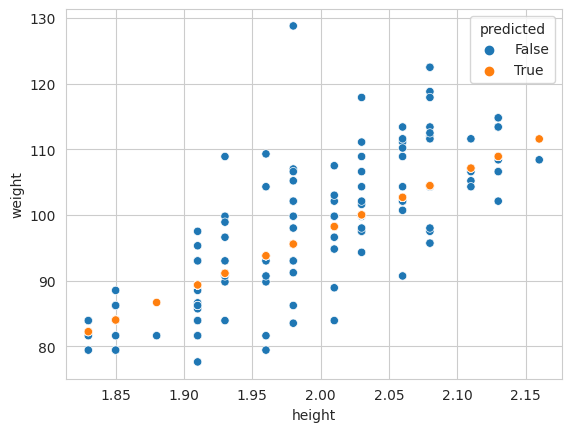

In [70]:
with sns.axes_style('whitegrid'): 
  sns.scatterplot(data=prediction, x = 'height', y ='weight', hue='predicted')

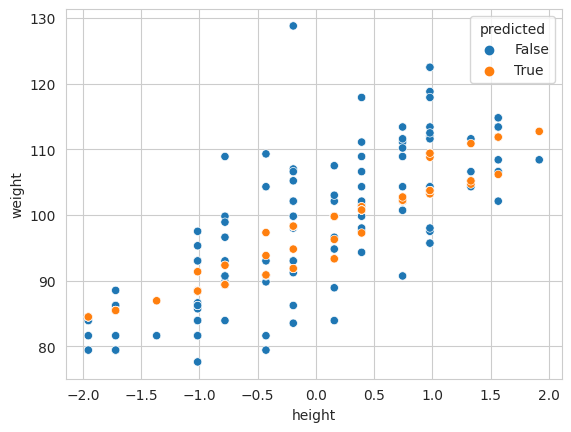

In [71]:
with sns.axes_style('whitegrid'): 
  sns.scatterplot(data=prediction_v2, x = 'height', y ='weight', hue='predicted')

## Predição

In [72]:
media = float(data['height'].mean())
desvio = float(data['height'].std())
print(media)
print(desvio)



1.3782078926381254e-16
1.0


In [73]:
altura = 2.05
altura_padronizada = (altura - 1.37) / 1
print(altura_padronizada)


0.6799999999999997


In [74]:
data.head(1)

,weight,height,position_f,position_fg,position_g,position_fc,position_c,position_gf,position_cf
0,113.4,0.743614,1,0,0,0,0,0,0


In [75]:
jogador = np.array([altura_padronizada, 1, 0, 0, 0, 0, 0, 0])
print(jogador)

[0.68 1.   0.   0.   0.   0.   0.   0.  ]


In [76]:
peso = model_v2.predict(jogador.reshape(1, -1))
peso

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([101.96496329])

#Classificação

###Pré Processamento

In [77]:
iris = sns.load_dataset('iris')

In [78]:
iris.head(1)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa


In [79]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [80]:
iris[['species']].drop_duplicates()

,species
0,setosa
50,versicolor
100,virginica


In [81]:
iris.query("species == 'versicolor'").describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,50.0,5.936,0.516171,4.9,5.600,5.90,6.3,7.0
sepal_width,50.0,2.770,0.313798,2.0,2.525,2.80,3.0,3.4
petal_length,50.0,4.260,0.469911,3.0,4.000,4.35,4.6,5.1
petal_width,50.0,1.326,0.197753,1.0,1.200,1.30,1.5,1.8


In [82]:
iris.query("species =='setosa'").describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,50.0,5.006,0.352490,4.3,4.8,5.0,5.200,5.8
sepal_width,50.0,3.428,0.379064,2.3,3.2,3.4,3.675,4.4
petal_length,50.0,1.462,0.173664,1.0,1.4,1.5,1.575,1.9
petal_width,50.0,0.246,0.105386,0.1,0.2,0.2,0.300,0.6


In [83]:
iris.query("species == 'virginica'").describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,50.0,6.588,0.635880,4.9,6.225,6.50,6.900,7.9
sepal_width,50.0,2.974,0.322497,2.2,2.800,3.00,3.175,3.8
petal_length,50.0,5.552,0.551895,4.5,5.100,5.55,5.875,6.9
petal_width,50.0,2.026,0.274650,1.4,1.800,2.00,2.300,2.5


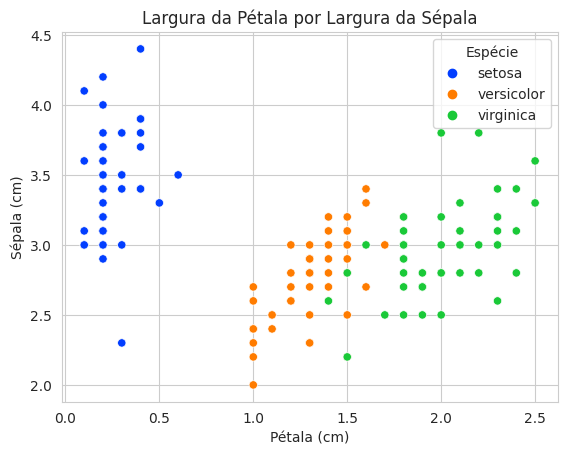

In [84]:
with sns.axes_style('whitegrid'): 
  grafico = sns.scatterplot(data = iris, x = 'petal_width', y = 'sepal_width', hue = 'species', palette='bright')
  grafico.set(title= 'Largura da Pétala por Largura da Sépala', xlabel= 'Pétala (cm)', ylabel = 'Sépala (cm)');
  grafico.get_legend().set_title('Espécie');

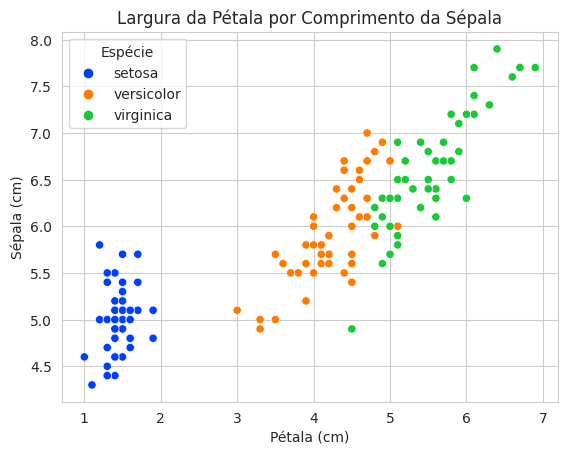

In [85]:
with sns.axes_style('whitegrid'): 
  grafico = sns.scatterplot(data = iris, x = 'petal_length', y = 'sepal_length', hue = 'species', palette='bright')
  grafico.set(title= 'Largura da Pétala por Comprimento da Sépala', xlabel= 'Pétala (cm)', ylabel = 'Sépala (cm)');
  grafico.get_legend().set_title('Espécie');

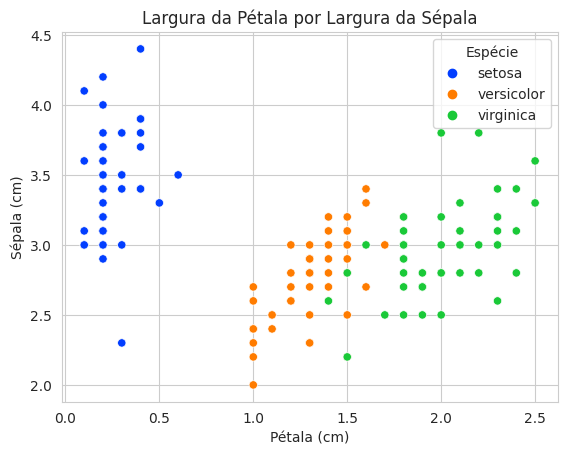

In [86]:
with sns.axes_style('whitegrid'): 
  grafico = sns.scatterplot(data = iris, x = 'petal_width', y = 'sepal_width', hue = 'species', palette='bright')
  grafico.set(title= 'Largura da Pétala por Largura da Sépala', xlabel= 'Pétala (cm)', ylabel = 'Sépala (cm)');
  grafico.get_legend().set_title('Espécie');

###Treino/Teste


In [87]:
iris.head(1)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa


In [88]:
data = iris[['species', 'sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

In [89]:
data.head(1)

,species,sepal_length,sepal_width,petal_length,petal_width
0,setosa,5.1,3.5,1.4,0.2


In [90]:
data.query("species == 'setosa'")

,species,sepal_length,sepal_width,petal_length,petal_width
0,setosa,5.1,3.5,1.4,0.2
1,setosa,4.9,3.0,1.4,0.2
2,setosa,4.7,3.2,1.3,0.2
3,setosa,4.6,3.1,1.5,0.2
4,setosa,5.0,3.6,1.4,0.2
5,setosa,5.4,3.9,1.7,0.4
6,setosa,4.6,3.4,1.4,0.3
7,setosa,5.0,3.4,1.5,0.2
8,setosa,4.4,2.9,1.4,0.2
9,setosa,4.9,3.1,1.5,0.1


In [91]:
predictors_train, predictors_test, target_train, target_test = train_test_split(
    data.drop(['species'], axis = 1),
    data['species'], 
    test_size = 0.25, 
    random_state = 123
)

In [92]:
predictors_train.head()

,sepal_length,sepal_width,petal_length,petal_width
16,5.4,3.9,1.3,0.4
82,5.8,2.7,3.9,1.2
60,5.0,2.0,3.5,1.0
35,5.0,3.2,1.2,0.2
143,6.8,3.2,5.9,2.3


In [93]:
predictors_train.shape

(112, 4)

In [94]:
predictors_test.shape

(38, 4)

In [95]:
target_train.shape

(112,)

In [96]:
target_test.shape

(38,)

In [97]:
data.shape

(150, 5)

In [98]:

model = DecisionTreeClassifier()
model = model.fit(predictors_train, target_train)

In [99]:
target_predicted = model.predict(predictors_test)
target_predicted

array(['versicolor', 'virginica', 'virginica', 'versicolor', 'setosa',
       'versicolor', 'versicolor', 'setosa', 'setosa', 'versicolor',
       'virginica', 'setosa', 'versicolor', 'virginica', 'virginica',
       'virginica', 'setosa', 'setosa', 'versicolor', 'setosa', 'setosa',
       'versicolor', 'setosa', 'virginica', 'setosa', 'setosa', 'setosa',
       'virginica', 'virginica', 'setosa', 'virginica', 'versicolor',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'virginica',
       'setosa'], dtype=object)

In [100]:
model.__dict__

{'criterion': 'gini',
 'splitter': 'best',
 'max_depth': None,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.0,
 'max_features': None,
 'max_leaf_nodes': None,
 'random_state': None,
 'min_impurity_decrease': 0.0,
 'class_weight': None,
 'ccp_alpha': 0.0,
 'feature_names_in_': array(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],
       dtype=object),
 'n_features_in_': 4,
 'n_outputs_': 1,
 'classes_': array(['setosa', 'versicolor', 'virginica'], dtype=object),
 'n_classes_': 3,
 'max_features_': 4,
 'tree_': <sklearn.tree._tree.Tree at 0x7faa86bb01f0>}

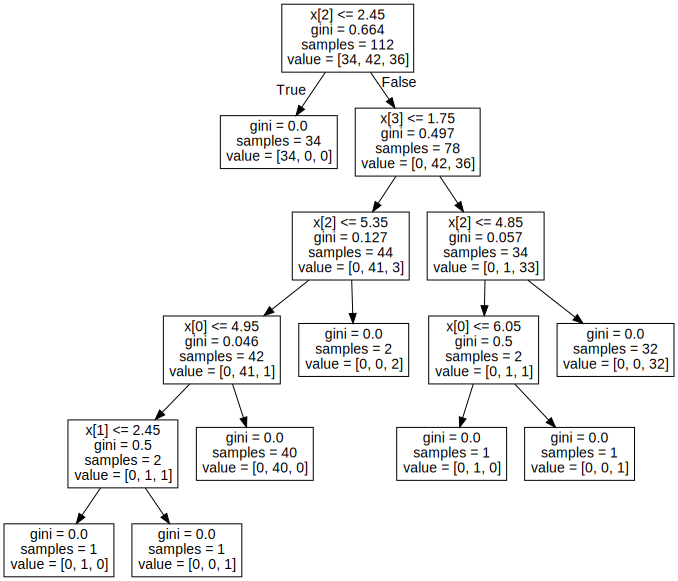

In [101]:

tree_data = tree.export_graphviz(model, out_file = None)
graph = graphviz.Source(tree_data)
graph

In [102]:
data.head()


,species,sepal_length,sepal_width,petal_length,petal_width
0,setosa,5.1,3.5,1.4,0.2
1,setosa,4.9,3.0,1.4,0.2
2,setosa,4.7,3.2,1.3,0.2
3,setosa,4.6,3.1,1.5,0.2
4,setosa,5.0,3.6,1.4,0.2


In [103]:
features = np.array([5.1, 3.5, 1.4, 0.2])
prediction = model.predict(features.reshape(1, -1))
print(prediction)

['setosa']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [104]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [105]:
target_predicted = model.predict(predictors_test)
target_predicted[0:5]

array(['versicolor', 'virginica', 'virginica', 'versicolor', 'setosa'],
      dtype=object)

In [106]:
target_predicted.shape

(38,)

Teste

In [107]:
target_test[0:5]

72     versicolor
112     virginica
132     virginica
88     versicolor
37         setosa
Name: species, dtype: object

###Matriz de confusão

Essa matriz tem como objetivo identificar o que foi acertado e o que não foi, então podemos observar, por exemplo, que a setosa foi assertiva, enquanto que versicolor teve 3 erros onde, a virginica foi visto como versicolor, e virginica não obteve erros.Essa matriz é muito boa para vermos por categoria os erros e acertos. Para realizarmos a soma deveremos realizar a diferença entre os valores acertados (16,8,11) por (16,8,11,3) para vermos a precisão disso.

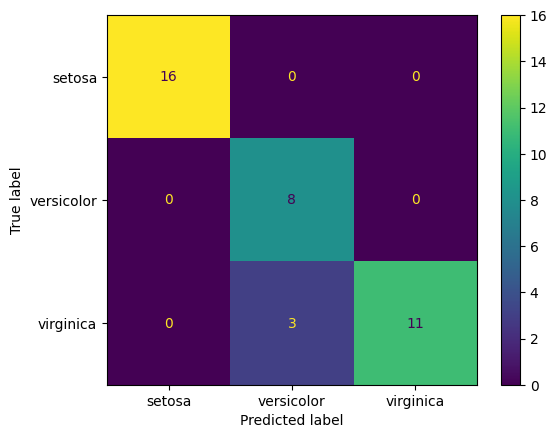

In [108]:
CM = confusion_matrix(target_test, target_predicted, labels = model.classes_)
CMd = ConfusionMatrixDisplay(confusion_matrix = CM, display_labels = model.classes_)
CMd.plot()

Vejamos isso de forma matemática. 

###Acurácia

In [109]:
total = CM.sum()
total

38

In [110]:
acertos = np.diag(CM).sum()
acertos

35

In [111]:
acuracia =100 * (acertos / total)
print(f'{acuracia:.2f}%')


92.11%


###Predição

In [112]:
flor = np.array([6.39, 2.71, 6.03, 2.23])
especie = model.predict(flor.reshape(1, -1))
especie

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['virginica'], dtype=object)

In [113]:
model.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

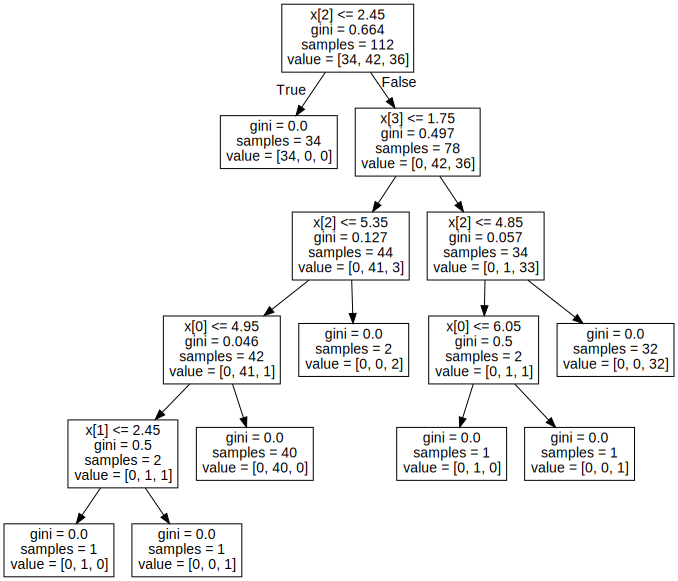

In [114]:
graph